In [1]:
%%time
from src.data.make_dataset import load_list, get_stock_data
from src.models.StockModel import StockModel
window_size = 20
start_date = '2017-01-01'
end_date = '2024-09-01'
feature_columns = ['Close', 'Open', 'Volume', 'Range', 'Gap', 'RSI', 'MACD']
target = "Open"

# Load symbols
nasdaq_symbols = load_list("NASDAQ")
sp500_symbols = load_list("SP500")

# Test tickers, sp500 symbols not also in nasdaq
test_tickers = [item for item in sp500_symbols if item not in nasdaq_symbols]
test_tickers = test_tickers[:1]

#tickers = ['^GSPC', '^IXIC', 'AAPL', 'MSFT', 'NVDA', 'AMZN', 'AVGO', 'META', 'GOOGL', 'GOOG', 'MMM', 'ADBE', 'BWA', 'GD', 'IT']
#tickers = ['^GSPC', '^IXIC']
train_tickers = ['^IXIC'] + nasdaq_symbols
train_tickers = train_tickers[:2]

# Download data
combined_data = get_stock_data(train_tickers, "1d", start_date, end_date)
combined_data.info()
# Test data
test_data = get_stock_data(test_tickers, "1d", start_date, end_date)

# Create and train model
stock_model = StockModel(window_size=window_size, feature_columns=feature_columns, target_name=target, export=True)

stock_model.train(combined_data, patience=10, epochs=150, graph=False, layers=1, units_per_layer=10)
metrics_dict, mean_metrics = stock_model.evaluate_many(test_data, graph=False)
print(metrics_dict)
print(mean_metrics)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3856 entries, 2017-01-03 00:00:00-05:00 to 2024-08-30 00:00:00-04:00
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          3856 non-null   float64
 1   High          3856 non-null   float64
 2   Low           3856 non-null   float64
 3   Close         3856 non-null   float64
 4   Volume        3856 non-null   int64  
 5   Dividends     3856 non-null   float64
 6   Stock Splits  3856 non-null   float64
 7   Ticker        3856 non-null   object 
dtypes: float64(6), int64(1), object(1)
memory usage: 271.1+ KB
Initializing model:
 - Window size: 20
 - Features: ['Close', 'Open', 'Volume', 'Range', 'Gap', 'RSI', 'MACD']
 - Target: Open
--- Preparing ^IXIC data using 20 window---
Feature columns: ['Close', 'Open', 'Volume', 'Range', 'Gap', 'RSI', 'MACD', 'MACD_Hist']
Target column: Open
Feature min [ 5.47700000e+03  5.44091016e+03  8.72110000e+08  1.43798828

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 10)                  │             760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 771 (3.01 KB)

 Trainable params: 771 (3.01 KB)

 Non-trainable params: 0 (0.00 B)

--- 1/2 Training model for ^IXIC ---
Epoch 1/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0262 - mape: 141.0582 - val_loss: 0.0350 - val_mape: 20.6321
Epoch 2/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0549 - mape: 281.8165 - val_loss: 0.0093 - val_mape: 9.2332
Epoch 3/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0353 - mape: 223.2881 - val_loss: 0.0071 - val_mape: 8.2826
Epoch 4/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0139 - mape: 124.8365 - val_loss: 0.0111 - val_mape: 11.2430
Epoch 5/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0094 - mape: 91.0948 - val_loss: 0.0141 - val_mape: 12.9526
Epoch 6/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0094 - mape: 92.1802 - val_loss: 0.0187 - val_mape: 15.3039
Epoch 7/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0080 - mape: 75.3845 - val_loss: 0.0142 - val_mape: 12.7970
Epoch 8/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0084 - mape: 87.2158 - val_loss: 0.0171 - val_mape: 1

In [ ]:
test_tickers = [item for item in sp500_symbols if item not in nasdaq_symbols]
test_tickers = test_tickers[:5]

#tickers = ['^GSPC', '^IXIC', 'AAPL', 'MSFT', 'NVDA', 'AMZN', 'AVGO', 'META', 'GOOGL', 'GOOG', 'MMM', 'ADBE', 'BWA', 'GD', 'IT']
#tickers = ['^GSPC', '^IXIC', '^DJI']
# Test data
test_data = get_stock_data(["^GSPC", "^DJI"], "1d", start_date, end_date)

metrics_dict, mean_metrics = stock_model.evaluate_many(test_data, graph=True)
print(metrics_dict)
print(mean_metrics)


Initializing model:
 - Window size: 20
 - Features: ['Close', 'Open', 'Volume', 'Range', 'Gap', 'RSI']
 - Target: Open
Saving model from 2024-09-02_23-24-54...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 1024)                │       4,222,976 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │           1,025 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,672,005 (48.34 MB)

 Trainable params: 4,224,001 (16.11 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,448,004 (32.23 MB)

Feature columns: ['Close', 'Open', 'Volume', 'Range', 'Gap', 'RSI']
Target column: Open
Feature min [ 2.23739990e+03  2.26160010e+03  1.29653000e+09  3.79003906e+00
 -2.02429932e+02  4.00986440e+00]
Feature max [5.66720020e+03 5.64408984e+03 9.97652000e+09 2.18959961e+02
 1.11319824e+02 1.00000000e+02]
Target min [2251.57006836]
Target max [5644.08984375]
Predict with X shape: (1907, 20, 6)
Target min [2251.57006836]
Target max [5644.08984375]
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step
Loss: 1218.1810 MAPE: 0.0067 R2: 0.9984


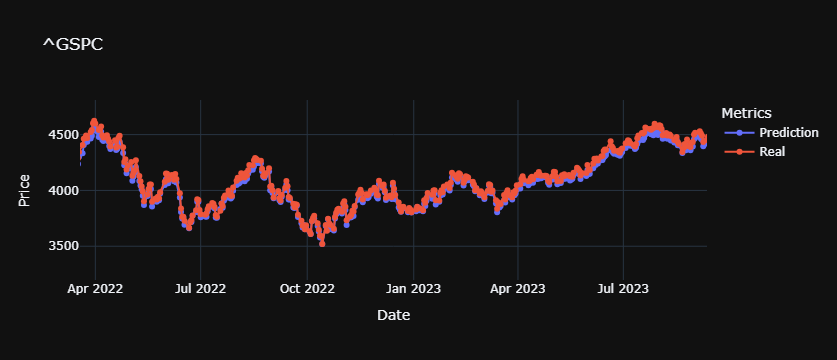

Feature columns: ['Close', 'Open', 'Volume', 'Range', 'Gap', 'RSI']
Target column: Open
Feature min [ 1.85919297e+04  1.90283594e+04  8.61500000e+07  3.91796875e+01
 -2.26808984e+03  7.28670712e+00]
Feature max [4.15630781e+04 4.13661602e+04 9.15990000e+08 1.90439062e+03
 1.14450000e+03 1.00000000e+02]
Target min [19028.359375]
Target max [41366.16015625]
Predict with X shape: (1907, 20, 6)
Target min [19028.359375]
Target max [41366.16015625]
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step
Loss: 54813.0500 MAPE: 0.0056 R2: 0.9981


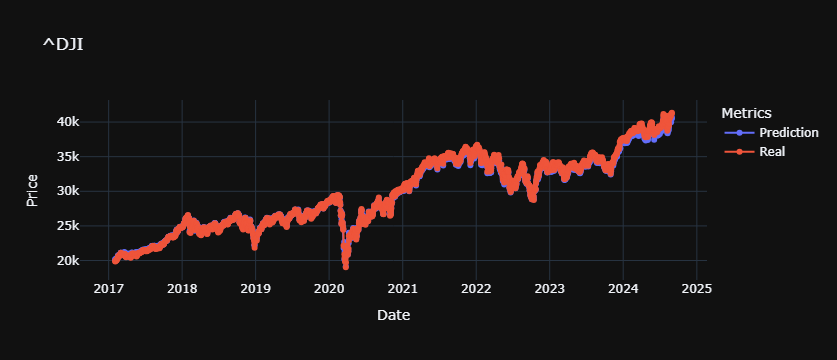

{'^GSPC': {'loss': 1218.1810463027423, 'mape': 0.006660966338363137, 'r2': 0.9984187122345171}, '^DJI': {'loss': 54813.049954996975, 'mape': 0.005601447789606516, 'r2': 0.9981102551213449}}
{'loss': 28015.61550064986, 'mape': 0.006131207063984827, 'r2': 0.998264483677931}


In [5]:
from src.data.make_dataset import load_list, get_stock_data
from src.models.StockModel import StockModel
window_size = 20
start_date = '2017-01-01'
end_date = '2024-09-01'
feature_columns = ['Close', 'Open', 'Volume', 'Range', 'Gap', 'RSI']
target = "Open"

# Test data
test_data = get_stock_data(["^GSPC", "^DJI"], "1d", start_date, end_date)

stock_model = StockModel(window_size=window_size, feature_columns=feature_columns, target_name=target, export=False)
stock_model.load("2024-09-02_23-24-54")

metrics_dict, mean_metrics = stock_model.evaluate_many(test_data, graph=True)
print(metrics_dict)
print(mean_metrics)
